- https://universe.roboflow.com/monopoly-poker/monopoly-poker/

In [1]:
# !pip install ultralytics

In [8]:
roboflow_api_key = 'xxx'
roboflow_url = f'https://public.roboflow.com/ds/gDw9FinxfR?key={roboflow_api_key}'
roboflow_url

'https://public.roboflow.com/ds/Jo5fPla7kC?key=xxx'

In [5]:
# must change roboflow_url
!curl -L "roboflow_url" > roboflow.zip
# !unzip -q roboflow.zip -d datasets/
# !mv "_data/Complete-Blood-Cell-Count-Dataset-Formats-master/YOLO" "datasets/Complete-Blood-Cell-Count-Dataset-Formats-master/"
# !rm -rf "_data/Complete-Blood-Cell-Count-Dataset-Formats-master"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:55 --:--:--     0-:--:--  0:00:04 --:--:--     0curl: (6) Could not resolve host: public.roboflow.com


In [1]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# fix for Jupyter notebook
%matplotlib inline

In [2]:
# Plot results image
def printYOLO(results):
    # Initialize a figure for plotting
    plt.figure(figsize=(10, 10))

    # Process results list
    for i, result in enumerate(results):
        # assuming plot() method returns a numpy array in BGR format
        bgr_array = result.plot()

        # Convert BGR to RGB
        rgb_array = bgr_array[:, :, ::-1]

        # Convert numpy array to PIL Image
        img = Image.fromarray(rgb_array)

        # Add a subplot for each image
        ax = plt.subplot(len(results), 1, i + 1)
        ax.imshow(img)
        ax.axis('off')  # Hide axes

    plt.tight_layout()
    plt.show()

- https://docs.ultralytics.com/tasks/detect/#models

In [3]:
model = YOLO("yolov8n.pt")

In [8]:
# Train the model
results = model.train(data="_data/monopoly-poker-config/yolo.yaml", epochs=3)

Ultralytics YOLOv8.1.5 🚀 Python-3.10.6 torch-2.2.2+cu121 CPU (Intel Core(TM) i7-8565U 1.80GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=_data/monopoly-poker-config/yolo.yaml, epochs=3, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train24, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

train: Scanning /mnt/c/Users/hl2/work_doc/code/git/CookbookPyCode/image_processing/datasets/monopoly-poker/train/labels... 633 images, 0 backgrounds, 0 corrupt: 100%|██████████| 633/633 [00:04<00:00, 140.87it/s]


train: New cache created: /mnt/c/Users/hl2/work_doc/code/git/CookbookPyCode/image_processing/datasets/monopoly-poker/train/labels.cache


val: Scanning /mnt/c/Users/hl2/work_doc/code/git/CookbookPyCode/image_processing/datasets/monopoly-poker/valid/labels... 129 images, 0 backgrounds, 0 corrupt: 100%|██████████| 129/129 [00:01<00:00, 84.91it/s] 


val: New cache created: /mnt/c/Users/hl2/work_doc/code/git/CookbookPyCode/image_processing/datasets/monopoly-poker/valid/labels.cache
Plotting labels to runs/detect/train24/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000139, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train24
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      1.075       4.89      1.338         30        640: 100%|██████████| 40/40 [04:46<00:00,  7.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:23<00:00,  4.80s/it]

                   all        129        481          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G     0.7309      4.533      1.144         34        640: 100%|██████████| 40/40 [04:23<00:00,  6.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:21<00:00,  4.28s/it]

                   all        129        481     0.0144     0.0469     0.0142     0.0127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G     0.6579      4.223      1.096         45        640: 100%|██████████| 40/40 [04:28<00:00,  6.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:20<00:00,  4.17s/it]

                   all        129        481     0.0358      0.402     0.0503     0.0459



3 epochs completed in 0.248 hours.
Optimizer stripped from runs/detect/train24/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train24/weights/best.pt, 6.3MB

Validating runs/detect/train24/weights/best.pt...
Ultralytics YOLOv8.1.5 🚀 Python-3.10.6 torch-2.2.2+cu121 CPU (Intel Core(TM) i7-8565U 1.80GHz)
Model summary (fused): 168 layers, 3050132 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<00:00,  3.57s/it]


                   all        129        481     0.0359      0.402     0.0505     0.0461
                     0        129          3          0          0          0          0
                     1        129          6     0.0112      0.667     0.0189     0.0182
                    10        129          5     0.0187        0.6     0.0387     0.0378
                    11        129          7     0.0207      0.714     0.0662      0.061
                    12        129          5     0.0345        0.2     0.0221     0.0177
                    13        129          7     0.0714      0.143     0.0416     0.0416
                    14        129          5     0.0116        0.4    0.00936    0.00835
                    15        129          7      0.017          1     0.0272     0.0257
                    16        129         10          0          0          0          0
                    17        129          7          0          0          0          0
                    1

In [7]:
# validation = model.val()

## Plot

In [9]:
view_images = [
    'datasets/monopoly-poker/test/images/20_jpg.rf.7527053eea85e0c4cf0fd210a8ca8a98.jpg',
    'datasets/monopoly-poker/test/images/51_jpg.rf.f5e28133b59adff7fdb548b66755873e.jpg',
    'datasets/monopoly-poker/test/images/DouWan_iPhone8p_X-Poker2305050638032-C_jpg.rf.575c61414c65fe39df8e32c4740c2719.jpg',
    'datasets/monopoly-poker/test/images/Screenrecorder-2024-03-31-11-39-59-654_mp4-0248_jpg.rf.cb4fdc768b5e8601f576c4e4f87974f3.jpg',
]
predictions = model.predict(view_images)


0: 640x640 (no detections), 1: 640x640 (no detections), 2: 640x640 (no detections), 3: 640x640 (no detections), 329.4ms
Speed: 1.8ms preprocess, 82.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


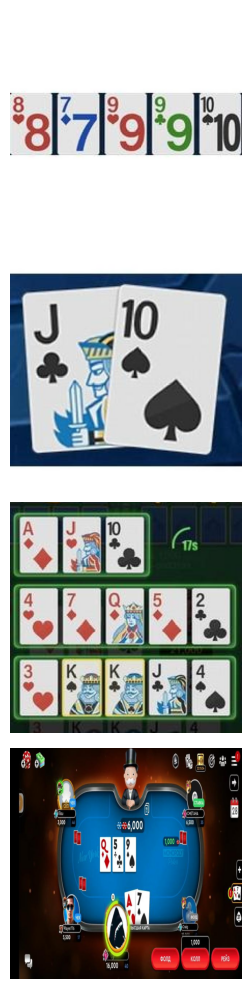

In [11]:
printYOLO(predictions)